In [222]:
from __future__ import print_function, division
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
from scipy.stats import chi2
chi2 = np.sqrt(chi2.ppf(0.95, 2))
chi2

2.447746830680816

In [224]:
def debug(items):
    for key, value in items.items():
        print(key, ":", value, ",")
    print()

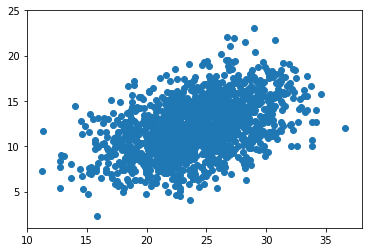

In [225]:
MEAN = np.array([24.00, 12.00])
COV = np.array([[16.00, 5.48], [5.48, 9.00]])
#MEAN = np.array([3, 3])
#COV = np.array([[0.3, -0.2], [-0.2, 1]])

def gen_data(mean=MEAN, cov=COV):
    return np.random.multivariate_normal(mean, cov, 1500)

def plot_point(data, ax):
    xs, ys = data[:, 0], data[:, 1]
    xmin, xmax = int(np.min(xs)), math.ceil(np.max(xs))
    ymin, ymax = int(np.min(ys)), math.ceil(np.max(ys))

    ax.set_xlim(xmin-1, xmax+1)
    ax.set_ylim(ymin-1, ymax+1)
    ax.scatter(data[:, 0], data[:, 1])

fig, ax = plt.subplots()
plot_point(gen_data(MEAN, COV), ax)     

mean : [23.8434803  11.95323985] ,
cov : [[16.21455093  5.67610722]
 [ 5.67610722  9.03844469]] ,

value : [ 5.9114164  19.34157923] ,
vector : [[ 0.48253105 -0.87587886]
 [-0.87587886 -0.48253105]] ,

large_error : 19.341579225080437 ,
small_error : 5.911416398340277 ,

a : 10.533406497121131 ,
b : 6.037398965543307 ,
theta : -149.4472048730315 ,



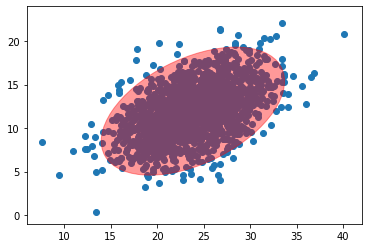

In [231]:
from matplotlib.patches import Ellipse

de
data = gen_data()
mean = np.mean(data, axis=0)
cov = np.cov(data[:, 0], data[:, 1])
debug({"mean": mean, "cov": cov})

eigen_values, eigen_vectors = np.linalg.eigh(cov)
debug({"value": eigen_values, "vector": eigen_vectors})

order = eigen_values.argsort()[::-1]
eigen_values = eigen_values[order]
eigen_vectors = eigen_vectors[order]
large_error, small_error = eigen_values
debug({"large_error":large_error, "small_error": small_error})

w = 2 * chi2 * math.sqrt(large_error)
h = 2 * chi2 * math.sqrt(small_error)

v = eigen_vectors[0]
angle = math.degrees(math.atan2(v[1], v[0]))
debug({"a":a, "b":b, "theta":theta})

fig, ax = plt.subplots()
el = Ellipse(xy=mean, width=w, height=h, angle=angle, color="red", alpha=0.4)
ax.add_artist(el)
plot_point(data, ax)